In [120]:
%matplotlib inline
import ipywidgets 
import numpy as np
import matplotlib.pyplot as plt
from control import matlab
import control
import scipy
#from IPython.display import display

# Electrisk krets analyse med Laplacetransformasjonen og Bode diagrammer

<img src="images/motivation.png" width="700" height="600">



# Sprangrespons

<img src="images/step.png" width="700" height="400">

<img src="images/laplace1.png" width="500" height="400">

<img src="images/RLClowpass2.png" width="500" height="400">



In [121]:
def pltRLC(vin,L,R,C):
    N = 500 # number of samples
    t = np.linspace(0,10,N) # time vector
    A = -vin 
    B = -vin/(R*C)
    a = 1/(2*R*C)
    b = np.sqrt(1/(L*C)-1/(4*(R**2)*(C**2)))
    c = 1/(L*C)
    vout = vin + np.exp(-a*t)*(A*np.cos(b*t)+((B-A*a)/b)*np.sin(b*t)) # compute response to step v_in 
    # figure
    plt.figure(figsize=(15,5))
    plt.plot(t,vout,linewidth=2,label='v_out(t)')
    plt.plot(t,vin*np.ones(N),linewidth=2,linestyle='--',label='v_in(t)')
    plt.xlabel('Time [s]')
    plt.ylabel('v_out [V]')
    plt.legend()
    plt.grid()

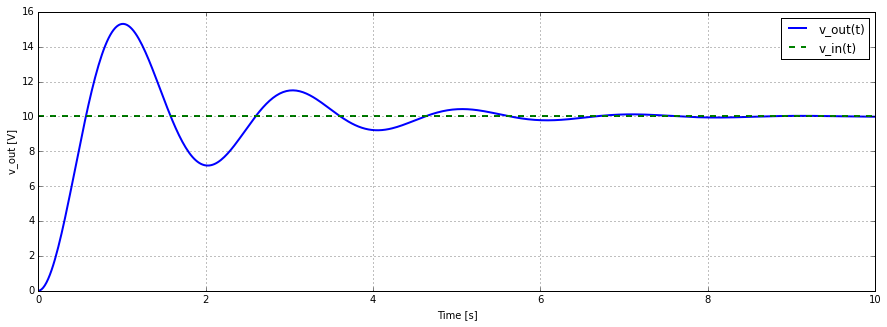

In [122]:
wvin = ipywidgets.FloatSlider(min =0,max=20,step=.1,value=10,description='Input voltage v_in [V]')
wL = ipywidgets.FloatSlider(min =0.1,max=2,step=.01,value=.5,description='Inductance L[H]')
wR = ipywidgets.FloatSlider(min =1,max=10,step=.01,value=4,description='Resistance R [Ohm]')
wC = ipywidgets.FloatSlider(min =0.01,max=.5,step=.01,value=.2,description='Capacitance C[F]')
ipywidgets.interact(pltRLC, vin =wvin, L=wL, R=wR, C = wC);

# Frekvensrespons og transferens funksjon

<img src="images/frequencyresponse.png" width="700" height="400">
<img src="images/LPF.png" width="700" height="400">
        

In [123]:
def pltLRC_forced(sys, b):
    N = 300 # number of points
    tend = 20 # end time
    t = np.linspace(0,tend,N) # time vector
    u = np.sin(b*t) # sinusoidal input signal with freq z
    t, yout, xout = control.forced_response(sys, t, u, 0) # simulates system response to input u
    # figures
    plt.figure(figsize=(15,5))
    plt.plot(t,u,'k--',linewidth=2,label='v_in(t)')
    plt.plot(t,yout,'b',linewidth =2,label='v_out(t)')
    plt.grid()
    plt.xlabel("Time (s)")
    plt.legend()
    plt.axis([0, 20, -1.5, 1.5])
    #plt.show()

Plot response of the system to a sinusoidal input with different frequencies

 $$v_{in}(t) = \sin(bt)$$

 $$H(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$$
 

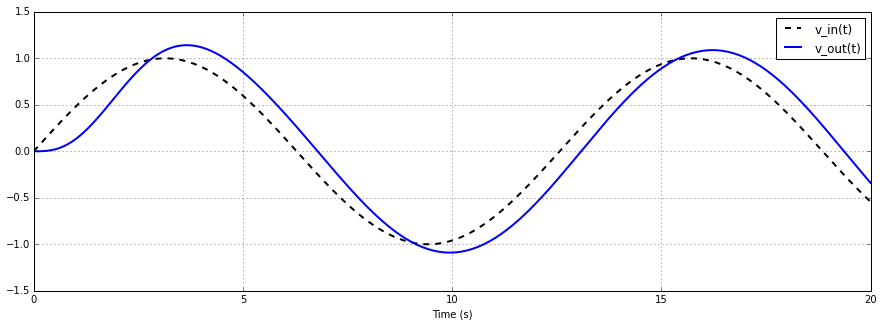

In [124]:
omega = 1.5
z = 0.35
sys = control.tf(omega**2,[1,2*z*omega,omega**2]) # creates transfer function system
wb = ipywidgets.FloatSlider(min =0.5,max=5,step=.1,value=0.5,description='Input sine wave frequency b[rads/s]')
ipywidgets.interact(pltLRC_forced, sys=ipywidgets.fixed(sys), b=wb);


# Bode diagrammer

<img src="images/bode.png" width="350" height="400">


In [125]:
def pltLRC_freqresponse(omega,z):
    sys = control.tf(omega**2,[1,2*z*omega,omega**2]) # creates transfer function
    mag, phase, w = control.bode(sys,np.logspace(1,3,500),linewidth=2,Plot=False); # Bode diagram
    plt.figure(figsize=(12,6))
    plt.subplot(2, 1, 1)
    plt.plot(w,mag,linewidth =3)
    plt.grid()
    #plt.xlabel("time (s)")
    plt.ylabel("Gain")
    #plt.axis([0, 10, -0.1, 1.1])
    plt.subplot(2, 1, 2)
    plt.plot(w,phase,linewidth =3)
    plt.grid()
    plt.xlabel("w[rads/s]")
    plt.ylabel("Phase [degrees]")
    plt.show()

Plotting frequency response of second order low pass filter

 $$H(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$$

c:\users\alex\anaconda3\lib\site-packages\control-0.6d-py3.4.egg\control\freqplot.py:124: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


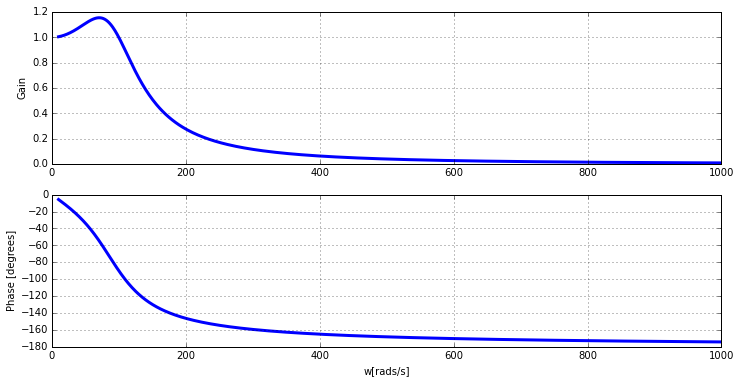

In [126]:
womega = ipywidgets.FloatSlider(min =0.1,max=1000,step=.1,value=100,description='Natural frequency w_n [rads/s]');
wz = ipywidgets.FloatSlider(min =0,max=1.2,step=.01,value=.5,description='Damping ratio z');
ipywidgets.interact(pltLRC_freqresponse, omega=womega, z=wz);

In [127]:
def pltLRCbode(omega,z):
    sys = control.tf(omega**2,[1,2*z*omega,omega**2]) # creates transfer function
    plt.figure(figsize=(12,6)) 
    mag, phase, w = control.bode(sys,np.logspace(1,3,500),linewidth=2) # Bode diagram

Plotting frequency response with logarithmic scales: Bode diagram

c:\users\alex\anaconda3\lib\site-packages\control-0.6d-py3.4.egg\control\freqplot.py:124: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


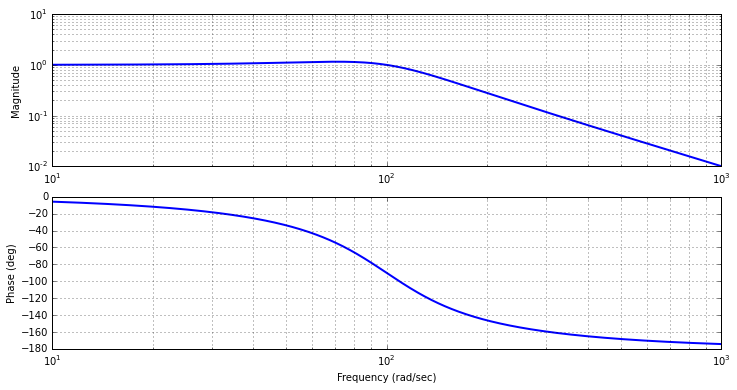

In [128]:
womega = ipywidgets.FloatSlider(min =0.1,max=1000,step=.1,value=100,description='Natural frequency w_n [rads/s]');
wz = ipywidgets.FloatSlider(min =0,max=1.2,step=.01,value=.5,description='Damping ratio z');
ipywidgets.interact(pltLRCbode, omega=womega, z=wz);

In [129]:
def pltLRCboth(omega,z):
    pltLRC_freqresponse(omega,z)
    pltLRCbode(omega,z)


In [130]:
#womega = ipywidgets.FloatSlider(min =0.1,max=1000,step=.1,value=100,description='Natural frequency w_n [rads/s]');
#wz = ipywidgets.FloatSlider(min =0,max=1.2,step=.01,value=.5,description='Damping ratio z');
#ipywidgets.interact(pltLRCboth, omega=womega, z=wz);


# Bode diagrammer av diverse transferens funksjoner
 
 ## Lavpass filter første orden
 $$H(s)=\frac{1}{s+1}$$

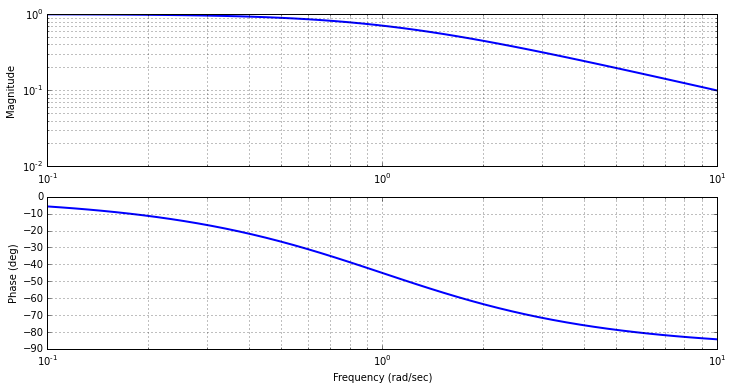

In [131]:
sys = control.tf(1,[1,1])
plt.figure(figsize=(12,6)) 
control.bode(sys,linewidth=2);

## Lavpass andre orden

$$H(s)=\frac{1}{(s+1)(s+10)}$$

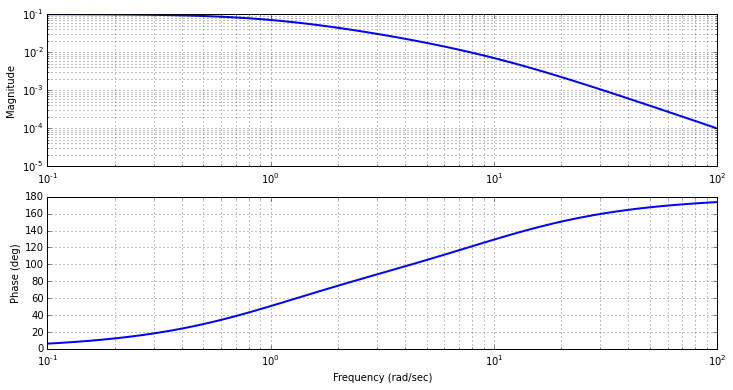

In [132]:
den = np.poly([1, 10])
sys = control.tf(1,den.tolist())
plt.figure(figsize=(12,6)) 
control.bode(sys,linewidth=2);

# Båndpassfilter 

 $$H(s)=\frac{s}{s^2+s+1}$$

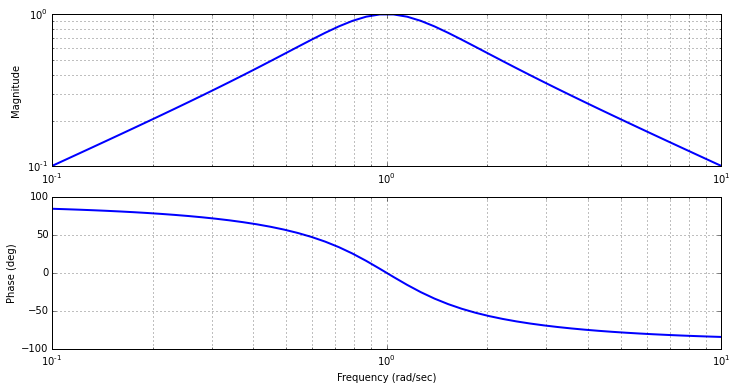

In [133]:
sys = control.tf([1,0],[1 ,1 ,1])
plt.figure(figsize=(12,6)) 
control.bode(sys,linewidth=2);

# Båndstoppfilter
 
 $$H(s)=\frac{s^2+1}{s^2+s+1}$$

c:\users\alex\anaconda3\lib\site-packages\control-0.6d-py3.4.egg\control\freqplot.py:124: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


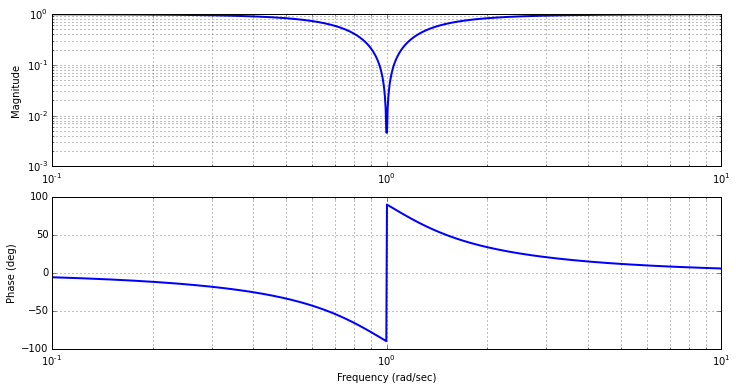

In [134]:
sys = control.tf([1,0,1],[1 ,1 ,1])
plt.figure(figsize=(12,6)) 
control.bode(sys,np.logspace(-1,1,1000),linewidth=2);